In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [90]:
data = pd.read_csv('Social_Net_class.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [91]:
data.describe() #way to get a quick overview of your data

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [93]:
#delete user id column
data.drop(columns='User ID')

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [94]:
lb=LabelEncoder()

In [95]:
data['Gender'] = lb.fit_transform(data['Gender'])
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [96]:
#select specific rows and columns of a DataFrame by their integer position
X = data.iloc[1:,:-1].values

y = data.iloc[1:,-1].values

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.5)

In [98]:
X_train[:3]

array([[15776733,        0,       28,    44000],
       [15807837,        1,       48,    33000],
       [15691808,        0,       40,    72000]])

In [99]:
y_train[:3]

array([0, 1, 0])

In [100]:
from sklearn.metrics import precision_score,recall_score,f1_score,r2_score

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [101]:
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('for k value:',i,'precision is:',precision_score(y_test,y_pred,average='weighted'))

for k value: 1 precision is: 0.715960729312763
for k value: 2 precision is: 0.7816374269005848
for k value: 3 precision is: 0.7686206896551724
for k value: 4 precision is: 0.7720279183923915
for k value: 5 precision is: 0.7681646168401136
for k value: 6 precision is: 0.7866555183946489
for k value: 7 precision is: 0.7626973684210526
for k value: 8 precision is: 0.8072774528914879
for k value: 9 precision is: 0.7693548387096775
for k value: 10 precision is: 0.7796969696969697


In [102]:
from sklearn.metrics import f1_score,classification_report,confusion_matrix,roc_auc_score

In [103]:
f1_list=[]  # list for f1_score
k_list=[] # list for K value
for k in range(1,11):
    clf=KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    f=f1_score(y_test,pred,average='macro')
    f1_list.append(f)
    k_list.append(k)

In [104]:
best_f1_score=max(f1_list)
best_k=k_list[f1_list.index(best_f1_score)]
print("Optimum K value=",best_k," with F1-Score=",best_f1_score)

Optimum K value= 8  with F1-Score= 0.7401247401247402


Text(0.5, 1.0, 'K neigbours vs f1_score')

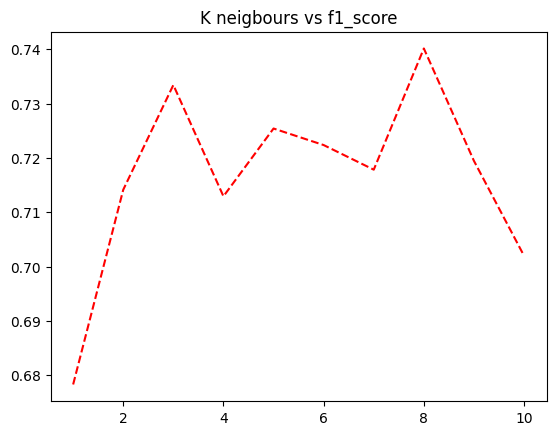

In [105]:
import matplotlib.pyplot as plt

plt.plot(k_list,f1_list,'r--')

plt.title('K neigbours vs f1_score')

In [106]:
#without scaling
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [108]:
y_pred = knn.predict(X_test)

In [120]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.775

In [121]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[120,  14],
       [ 31,  35]])

Text(50.722222222222214, 0.5, 'Actual')

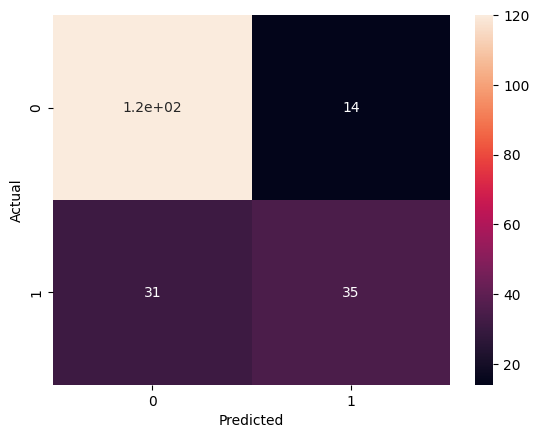

In [122]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,)
plt.xlabel('Predicted')
plt.ylabel('Actual')

Conclusion = Accuracy came near 77.5% with '14' false positive and '31' false negative.

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       134
           1       0.71      0.53      0.61        66

    accuracy                           0.78       200
   macro avg       0.75      0.71      0.73       200
weighted avg       0.77      0.78      0.77       200



In [124]:
print(accuracy_score(y_test,y_pred)*100)

77.5


In [125]:
# KNN classifier with feature scaling
from sklearn.preprocessing import StandardScaler

In [126]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled[:3]

array([[ 1.22321117, -1.00503782, -0.91319303, -0.71936405],
       [ 1.65876594,  0.99498744,  0.92056492, -1.03696951],
       [ 0.03399148, -1.00503782,  0.18706174,  0.08908623]])

In [127]:
knn_scaled = KNeighborsClassifier(n_neighbors=5)

knn_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [128]:
y_pred_scale = knn_scaled.predict(X_test_scaled)

accuracy_scale = accuracy_score(y_test, y_pred_scale)
accuracy_scale

0.925

In [129]:
conf_matrix_scale = confusion_matrix(y_test, y_pred_scale)
conf_matrix_scale

array([[126,   8],
       [  7,  59]])

Text(50.722222222222214, 0.5, 'Actual')

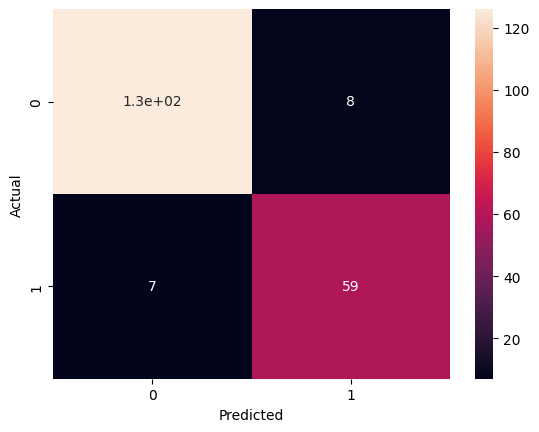

In [130]:
sns.heatmap(confusion_matrix(y_test,y_pred_scale),annot=True,)

plt.xlabel('Predicted')

plt.ylabel('Actual')

conclusion=with feature scalling performance of model is improve
from 77.5% to 92.5%